# Let's Cluster some Credit Cards!
In this notebook we will try to cluster some credit cards. We will go through preprocessing, choose a model and train it on our data, and then evaluate our outcomes.

The dataset you will use is `Credit Card Dataset.csv`

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# EDA
Explore the Dataset Perform initial exploration of your dataset. Understand the features and the distribution of data.

In [2]:
df = pd.read_csv("Datasets/Credit Card Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## let's take a copy of the dataframe and start exploring the data and clean it.

In [3]:
df_c = df.copy()

In [4]:
df_c.shape

(8950, 18)

In [5]:
df_c.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

## we can see that the number of unique values in the 'CUST_ID' are 8950, because it's uniqe identifier for each row, 
## i will drop it.

In [6]:
df_c.drop('CUST_ID', axis=1, inplace=True)

### statistical summary of the data

In [7]:
df_c.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## let's view the mean and the medain, so we can see if there is any potential outliers.

In [8]:
summary = df_c.describe().T
mean_median = summary[['mean', '50%']]
print(mean_median)

                                         mean          50%
BALANCE                           1564.474828   873.385231
BALANCE_FREQUENCY                    0.877271     1.000000
PURCHASES                         1003.204834   361.280000
ONEOFF_PURCHASES                   592.437371    38.000000
INSTALLMENTS_PURCHASES             411.067645    89.000000
CASH_ADVANCE                       978.871112     0.000000
PURCHASES_FREQUENCY                  0.490351     0.500000
ONEOFF_PURCHASES_FREQUENCY           0.202458     0.083333
PURCHASES_INSTALLMENTS_FREQUENCY     0.364437     0.166667
CASH_ADVANCE_FREQUENCY               0.135144     0.000000
CASH_ADVANCE_TRX                     3.248827     0.000000
PURCHASES_TRX                       14.709832     7.000000
CREDIT_LIMIT                      4494.449450  3000.000000
PAYMENTS                          1733.143852   856.901546
MINIMUM_PAYMENTS                   864.206542   312.343947
PRC_FULL_PAYMENT                     0.153715     0.0000

### 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
### 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS'.
### All of these columns seems to have potential outliers

## checking missing values and duplicates

In [9]:
df_c.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### 'MINIMUM_PAYMENTS' have 313 nulls, and also from the above statistical summary we can see that the 
### mean and median are varied and it's not a good soluation to impute it so I will drop the nulls.
### and just 1 null in the 'CREDIT_LIMIT' I will drop it.

In [10]:
df_c.dropna(subset=['MINIMUM_PAYMENTS'], inplace=True)
df_c.dropna(subset=['CREDIT_LIMIT'], inplace=True)

## check for duplicates

In [11]:
df_c.duplicated().sum()

0

### corrleation

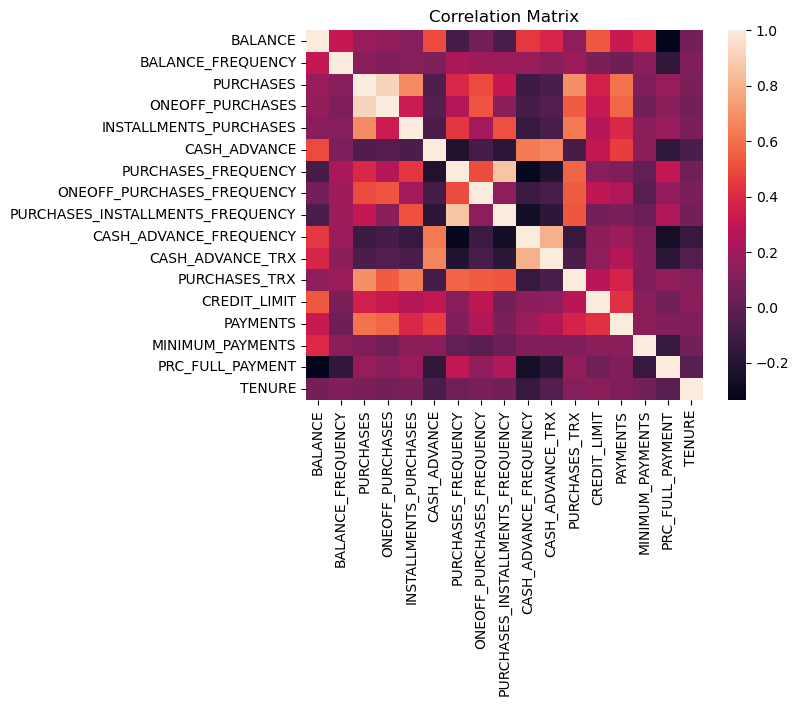

In [12]:
corr_matrix = df_c.corr()
sns.heatmap(corr_matrix)
plt.title("Correlation Matrix")
plt.show()

In [13]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT_LIMI

## histogram to visualize the numerical columns.

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

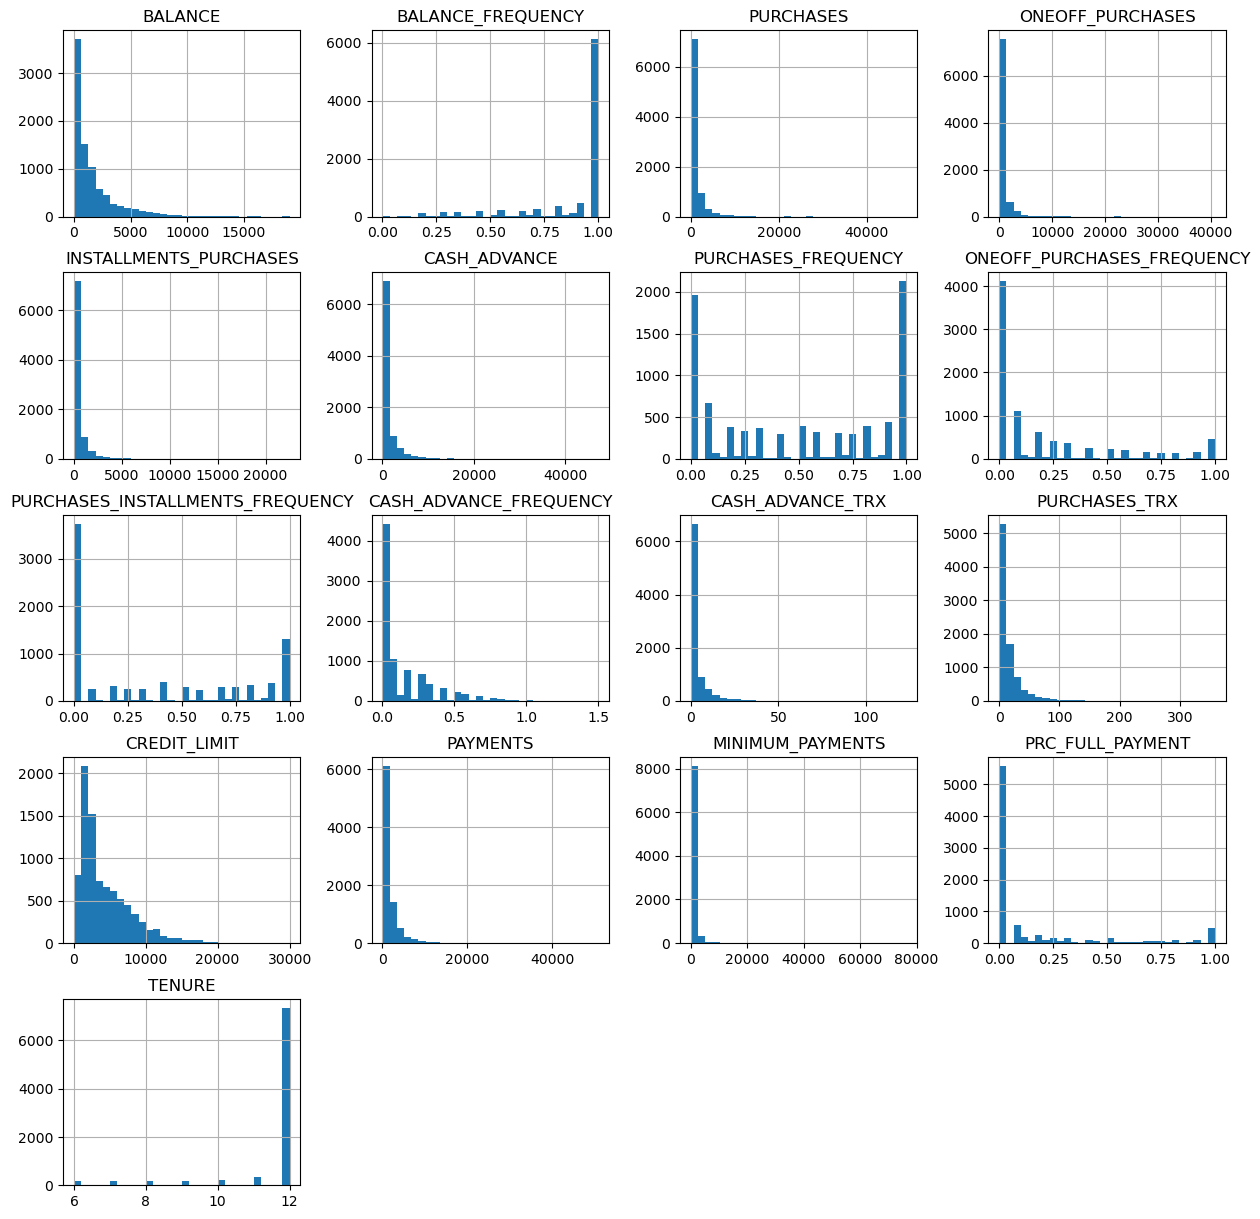

In [14]:
df_c.hist(bins=30, figsize=(15,15))

### we can that there are many features are heavily skewed.

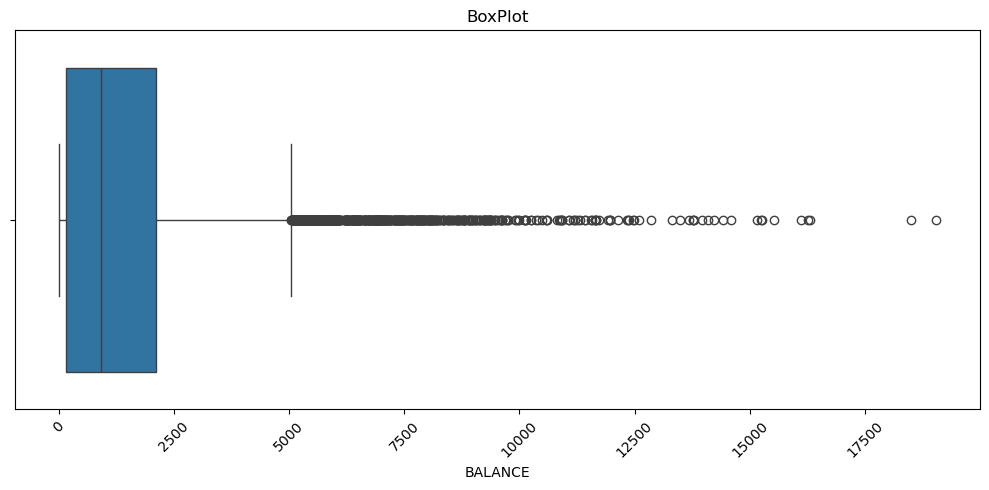

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_c['BALANCE'], legend=False)
plt.title("BoxPlot")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## now let's inspect all the columns

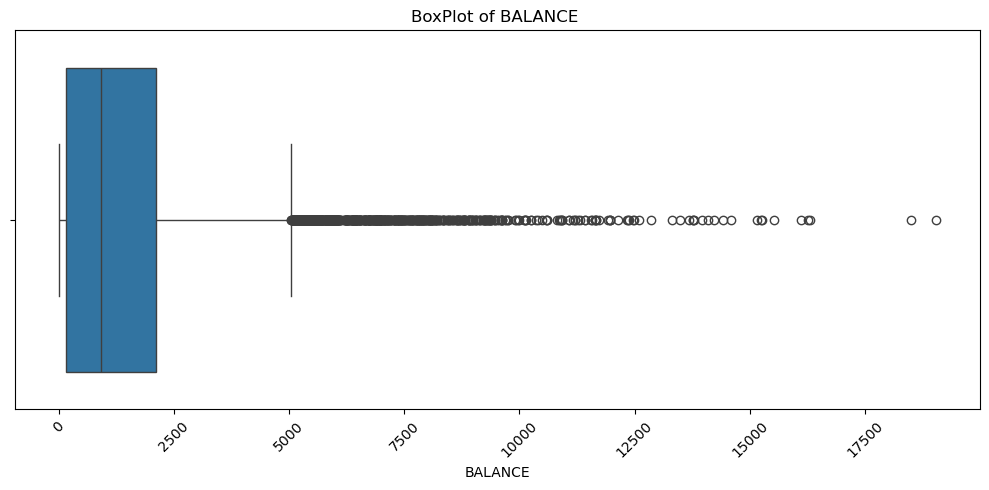

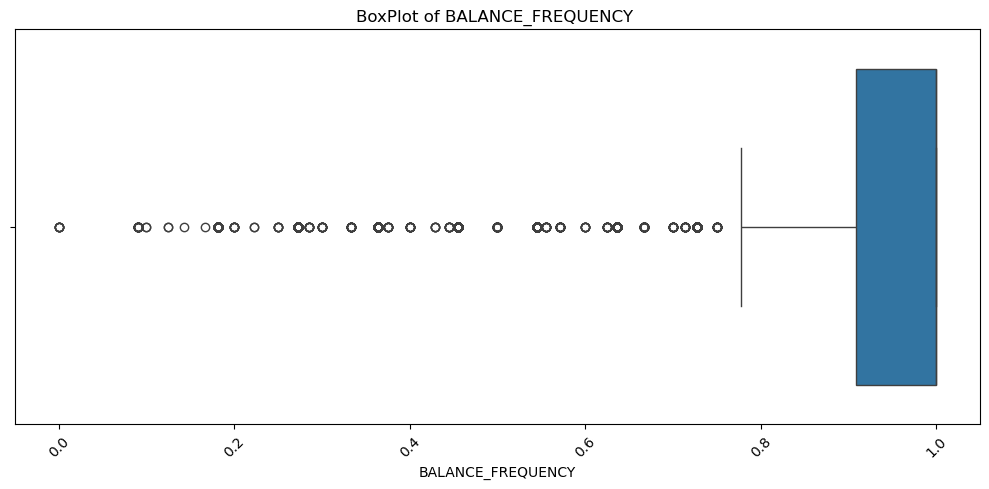

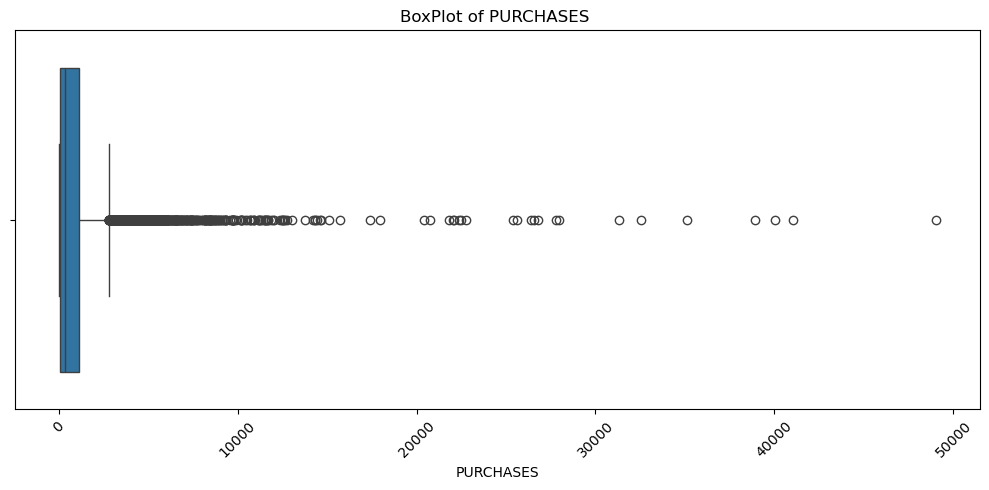

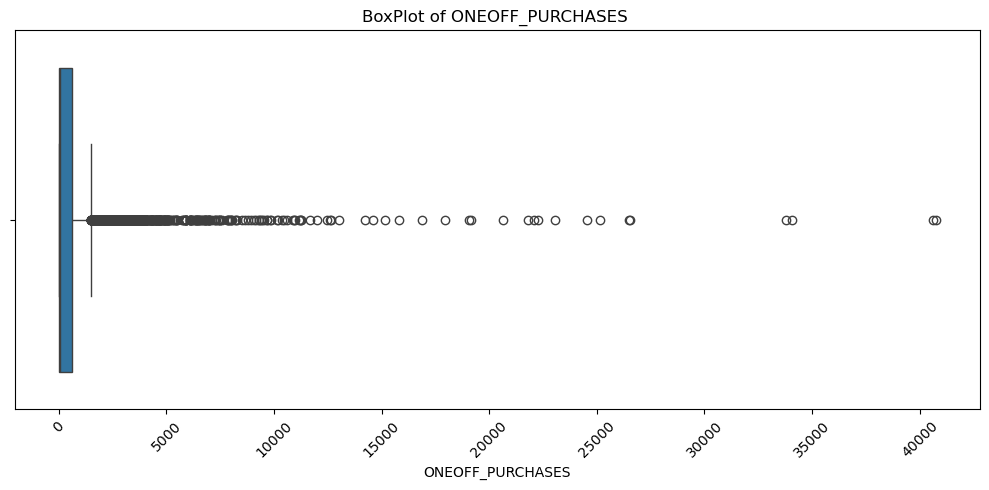

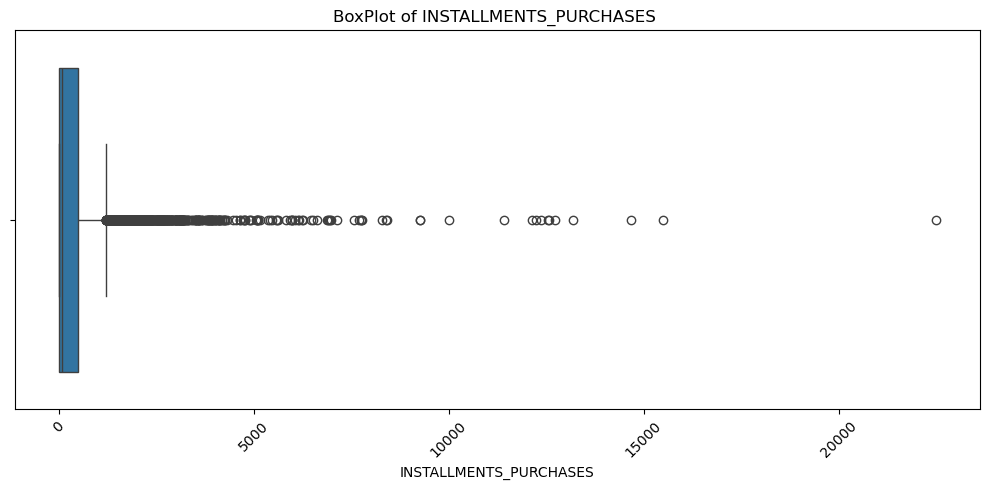

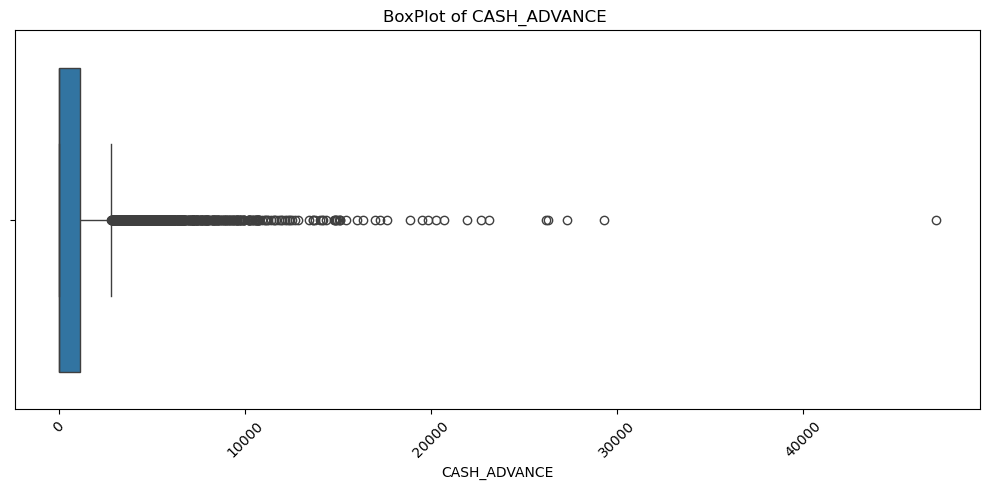

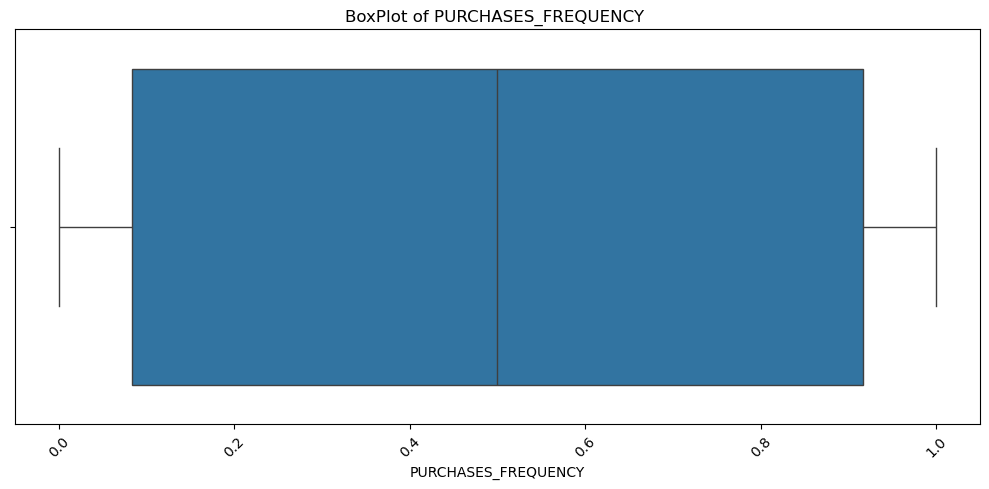

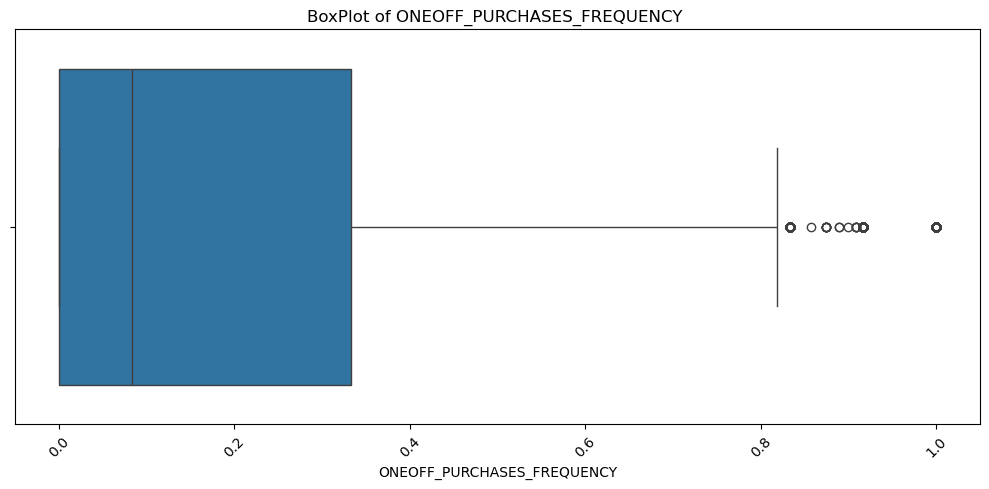

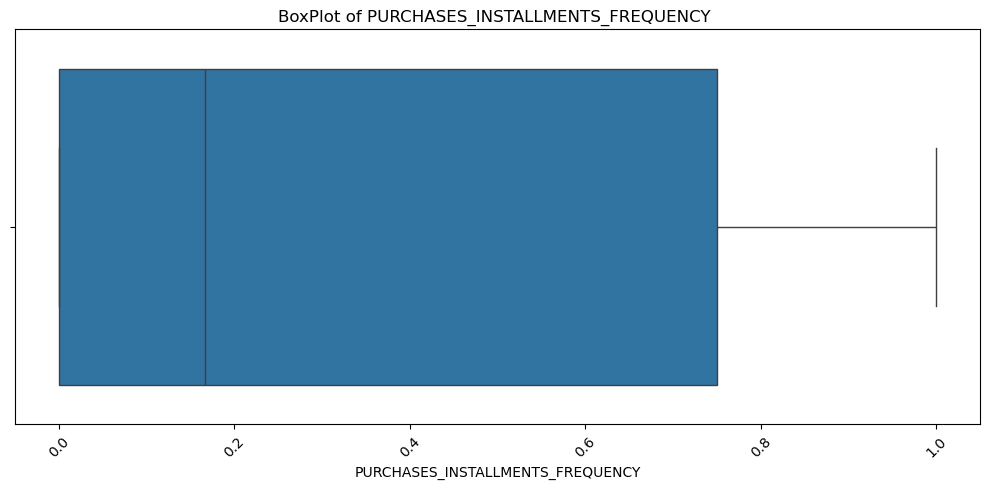

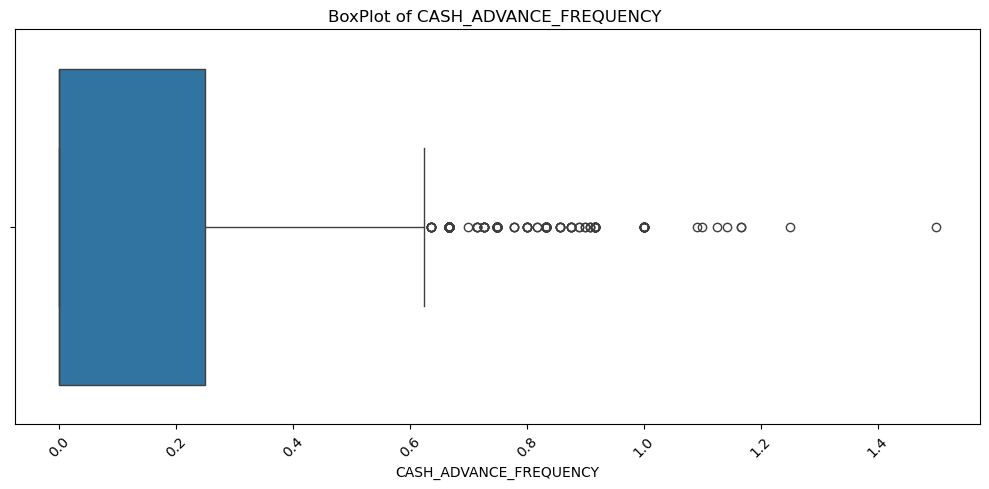

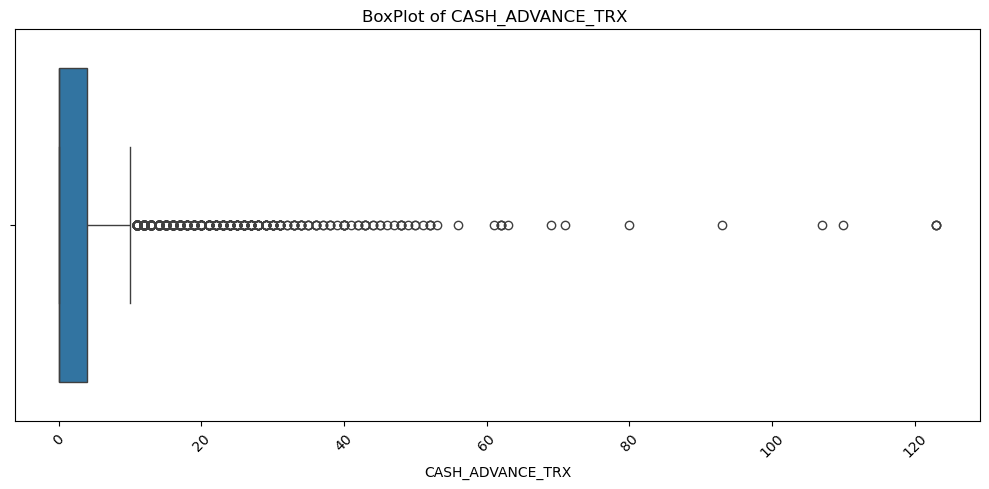

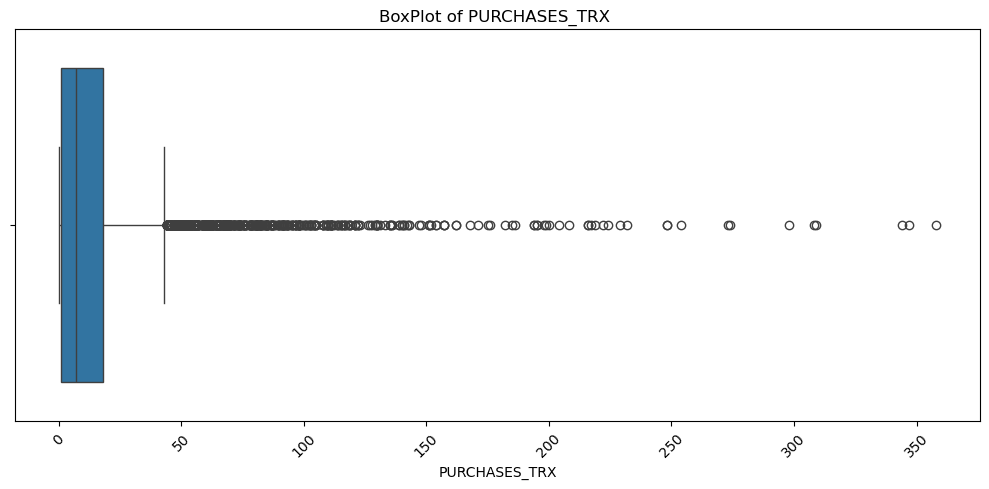

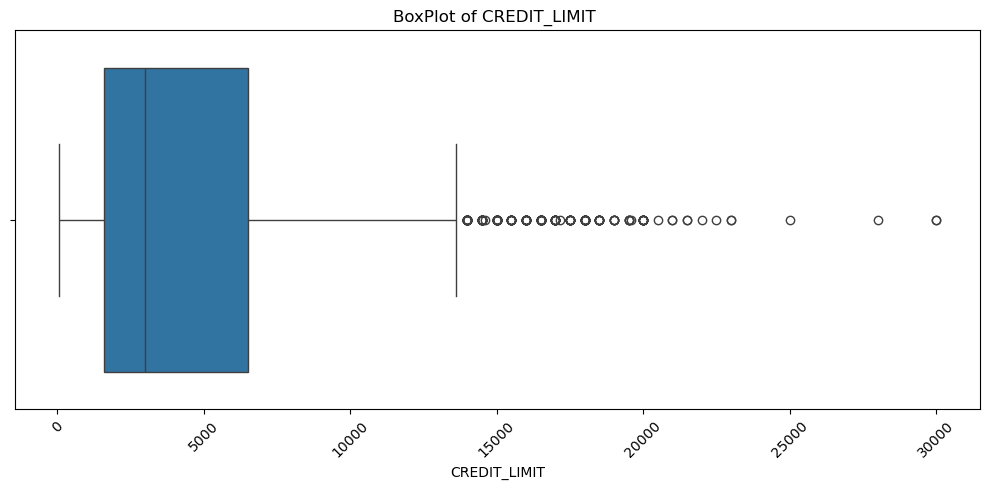

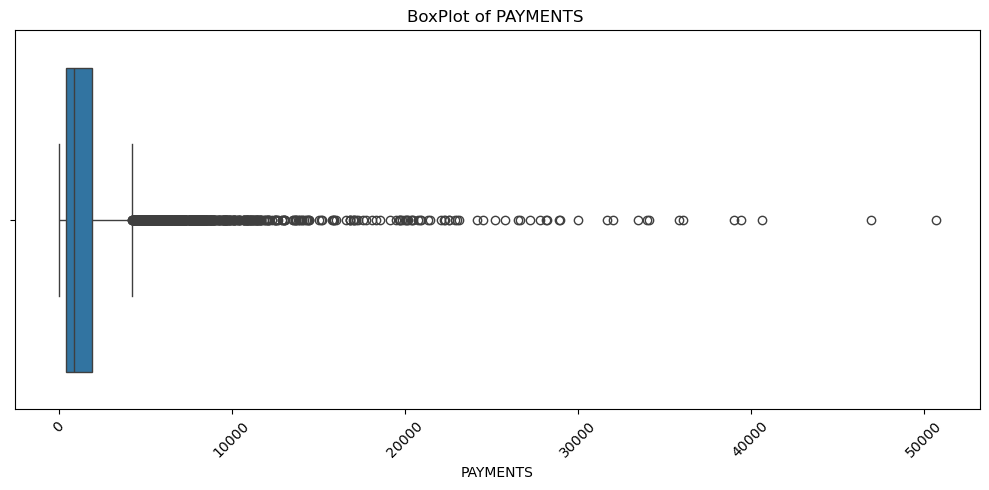

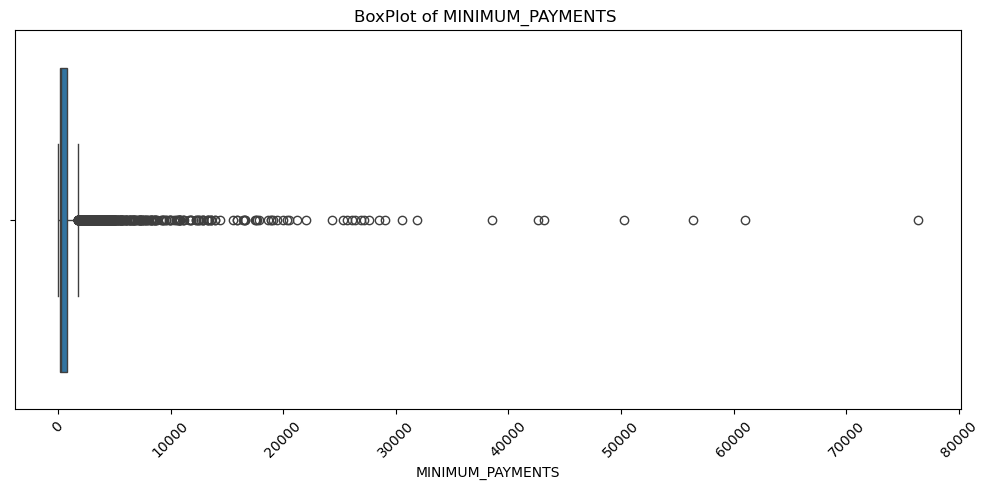

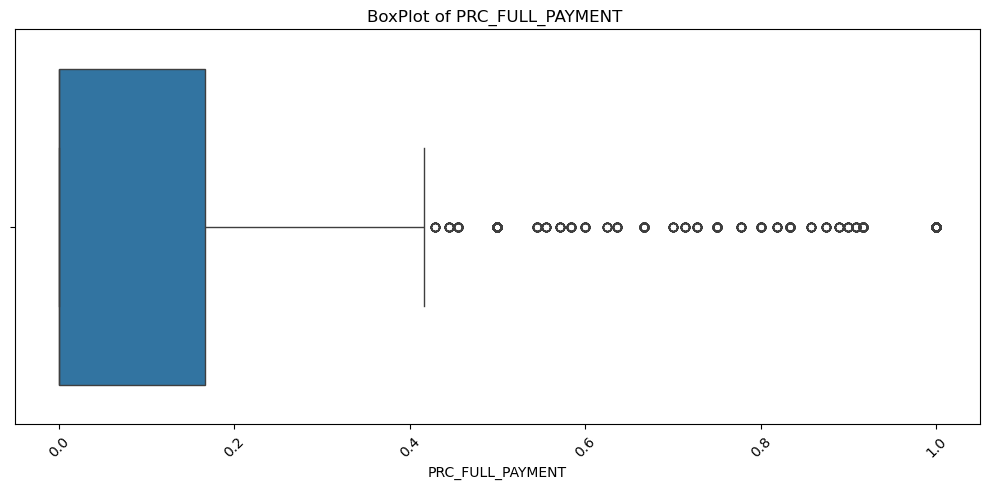

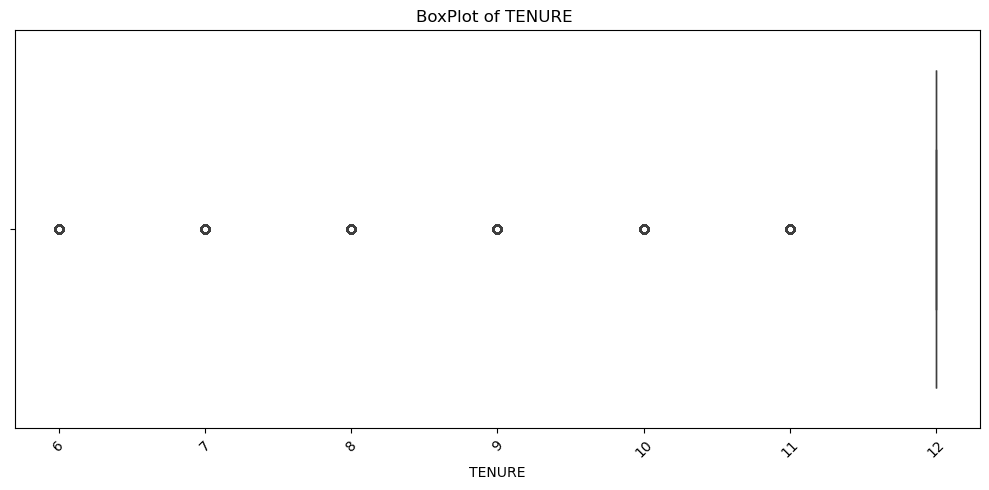

In [16]:

for col in df_c.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df_c[col])
    plt.title(f"BoxPlot of {col} ")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## **Boxplot Analysis Summary**


### we will apply the rule  (IQR = Q3 — Q1)

#### **BALANCE**: Outliers above 16,000.

#### **BALANCE_FREQUENCY**: No outliers (values between 0 and 1).

#### **PURCHASES**: Outliers above 45,000.

#### **ONEOFF_PURCHASES**: Outliers above 40,000.

#### **INSTALLMENTS_PURCHASES**: Outliers above 20,000.

- **CASH_ADVANCE**: Outliers above 40,000.

- **PURCHASES_FREQUENCY**: No outliers (values between 0 and 1).

- **ONEOFF_PURCHASES_FREQUENCY**: No outliers (values between 0 and 1).

- **PURCHASES_INSTALLMENTS_FREQUENCY**: No outliers (values between 0 and 1).

- **CASH_ADVANCE_FREQUENCY**: No outliers (values between 0 and 1).

- **CASH_ADVANCE_TRX**: Not applicable (just a count).

- **PURCHASES_TRX**: Not applicable (just a count).

- **CREDIT_LIMIT**: Appears normal, no significant outliers.

- **PAYMENTS**: Outliers above 45,000.

- **MINIMUM_PAYMENTS**: Outliers above 70,000.

- **PRC_FULL_PAYMENT**: No outliers (values between 0 and 1).

- **TENURE**: Not applicable.


# Preprocessing
1. Remove the outliers
2. Impute missing data
3. Scale the data
4. Reduce dimentions using PCA

In [17]:

def handle_outliers_zscore(df, threshold=3):
    """
    Handle outliers using the Z-Score method.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        threshold (float): The Z-Score threshold to identify outliers.
        
    Returns:
        pd.DataFrame: The DataFrame after handling outliers.
    """    
    z_scores = np.abs(zscore(df))
    df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    
    return df_no_outliers

In [18]:
df_cleaned = handle_outliers_zscore(df_c, threshold=5)

In [19]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8336 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8336 non-null   float64
 1   BALANCE_FREQUENCY                 8336 non-null   float64
 2   PURCHASES                         8336 non-null   float64
 3   ONEOFF_PURCHASES                  8336 non-null   float64
 4   INSTALLMENTS_PURCHASES            8336 non-null   float64
 5   CASH_ADVANCE                      8336 non-null   float64
 6   PURCHASES_FREQUENCY               8336 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8336 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8336 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8336 non-null   float64
 10  CASH_ADVANCE_TRX                  8336 non-null   int64  
 11  PURCHASES_TRX                     8336 non-null   int64  
 12  CREDIT_LIMI

In [20]:
summary = df_cleaned.describe().T
mean_median = summary[['mean', '50%']]
print(mean_median)

                                         mean          50%
BALANCE                           1478.116403   867.886442
BALANCE_FREQUENCY                    0.893085     1.000000
PURCHASES                          858.375639   365.130000
ONEOFF_PURCHASES                   498.725161    39.850000
INSTALLMENTS_PURCHASES             359.898155    90.000000
CASH_ADVANCE                       871.893953     0.000000
PURCHASES_FREQUENCY                  0.492187     0.500000
ONEOFF_PURCHASES_FREQUENCY           0.200504     0.083333
PURCHASES_INSTALLMENTS_FREQUENCY     0.363945     0.166667
CASH_ADVANCE_FREQUENCY               0.131915     0.000000
CASH_ADVANCE_TRX                     2.926823     0.000000
PURCHASES_TRX                       13.387836     7.000000
CREDIT_LIMIT                      4328.662204  3000.000000
PAYMENTS                          1496.932525   865.051593
MINIMUM_PAYMENTS                   683.634691   296.278572
PRC_FULL_PAYMENT                     0.158569     0.0000

- 'BALANCE',

- 'BALANCE_FREQUENCY', 

- 'PURCHASES',

- 'ONEOFF_PURCHASES',

- 'INSTALLMENTS_PURCHASES'

- 'CASH_ADVANCE', 

- 'PURCHASES_FREQUENCY',

- 'ONEOFF_PURCHASES_FREQUENCY',

- 'PURCHASES_INSTALLMENTS_FREQUENCY',

- 'CASH_ADVANCE_FREQUENCY', 

- 'CASH_ADVANCE_TRX', 

- 'PURCHASES_TRX',

- 'CREDIT_LIMIT',

- 'PAYMENTS', 

- 'MINIMUM_PAYMENTS',

- 'PRC_FULL_PAYMENT',

- 'TENURE'

In [21]:
df_payment_type = df_cleaned[['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']]
df_payment_type.value_counts().head()


ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
0.00              0.0                       1901
45.65             0.0                         25
60.00             0.0                          9
50.00             0.0                          9
200.00            0.0                          8
Name: count, dtype: int64

In [22]:
# INSTALLMENTS_PURCHASES complate, 2098
df_cleaned['INSTALLMENTS_PURCHASES'].where((df_cleaned['INSTALLMENTS_PURCHASES'] > 0) & (df_cleaned['ONEOFF_PURCHASES'] == 0)).value_counts().sum()

2098

In [23]:
# ONEOFF_PURCHASES complate, 1740
df_cleaned['ONEOFF_PURCHASES'].where((df_cleaned['ONEOFF_PURCHASES'] > 0) & (df_cleaned['INSTALLMENTS_PURCHASES'] == 0)).value_counts().sum()

1740

In [24]:
# Another payment method, 1901
df_cleaned['ONEOFF_PURCHASES'].where((df_cleaned['ONEOFF_PURCHASES'] == 0) & (df_cleaned['INSTALLMENTS_PURCHASES'] == 0)).value_counts().sum()

1901

In [25]:
# Both 2597
df_cleaned['ONEOFF_PURCHASES'].where((df_cleaned['ONEOFF_PURCHASES'] > 0) & (df_cleaned['INSTALLMENTS_PURCHASES'] > 0)).value_counts().sum()

2597

In [26]:
(2098 + 1740 + 1901 + 2597) # True 

8336

In [27]:
4695 + 4337 # not really 

9032

In [28]:
payment_type_df = pd.DataFrame([[2098, 1740, 1901, 2597]], columns=['INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES', 'Another_payment_method', 'Both'])
payment_type_df

,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES,Another_payment_method,Both
0,2098,1740,1901,2597


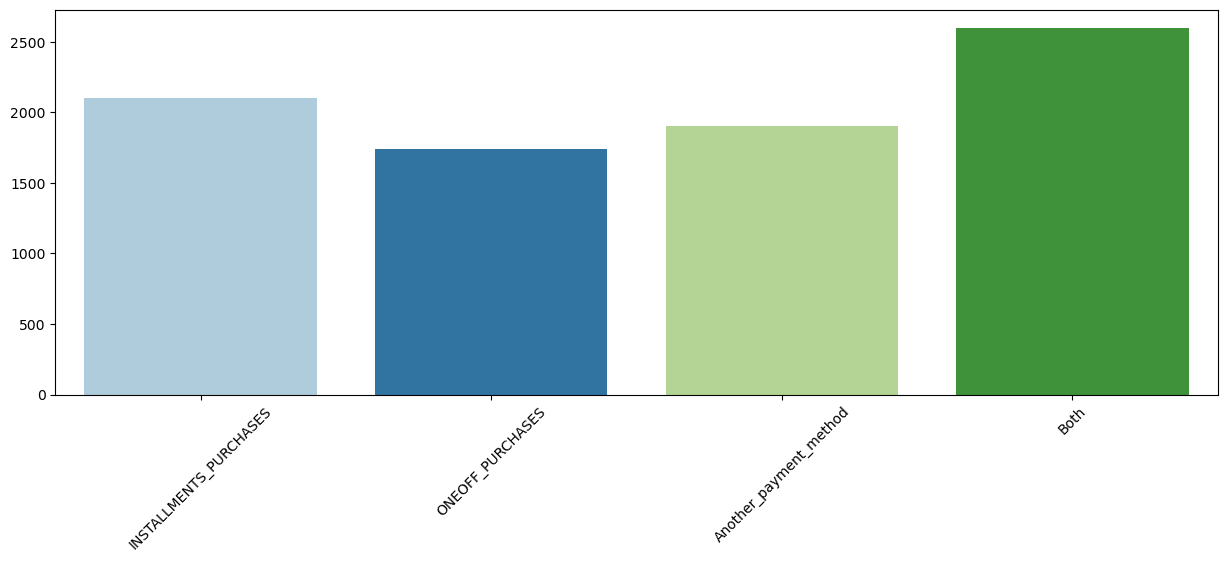

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(data=payment_type_df, palette='Paired')
plt.xticks(rotation=45)
plt.show()

In [30]:
df_cleaned.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<Axes: xlabel='BALANCE', ylabel='MINIMUM_PAYMENTS'>

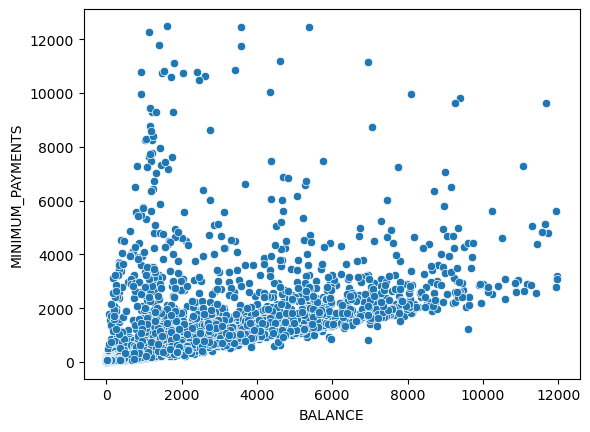

In [31]:
sns.scatterplot(data=df_cleaned, x='BALANCE', y='MINIMUM_PAYMENTS')

In [32]:
df_cleaned['PRC_FULL_PAYMENT'].value_counts().head()

PRC_FULL_PAYMENT
0.000000    5415
1.000000     471
0.083333     400
0.166667     155
0.500000     151
Name: count, dtype: int64

In [33]:
df_cleaned['BALANCE'].describe()

count     8336.000000
mean      1478.116403
std       1874.831625
min          0.000000
25%        134.950288
50%        867.886442
75%       1961.801592
max      11972.011040
Name: BALANCE, dtype: float64

In [34]:
df_cleaned['BALANCE'].nlargest(10)

174     11972.01104
2403    11964.83264
1920    11955.30817
2780    11930.78446
1781    11734.26656
1697    11670.17985
866     11654.55492
4754    11581.93350
1450    11431.78621
2485    11416.64736
Name: BALANCE, dtype: float64

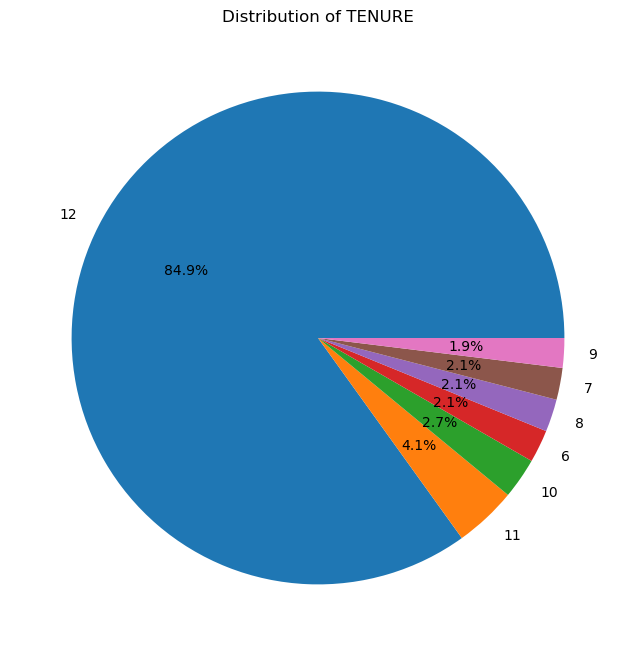

In [35]:
plt.figure(figsize=(8, 8))
df_cleaned['TENURE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of TENURE')
plt.ylabel('')
plt.show()

## scaling 

In [36]:
std_scaler = StandardScaler()
df_std_scaled = std_scaler.fit_transform(df_cleaned)

min_max_scaler = MinMaxScaler()
df_min_max_scaled = min_max_scaler.fit_transform(df_cleaned)

In [37]:
df_std_scaled

array([[-0.76662984, -0.35810427, -0.58809044, ..., -0.50156133,
        -0.53619423,  0.35760344],
       [ 0.91979164,  0.07652488, -0.66162337, ...,  0.35829946,
         0.21523957,  0.35760344],
       [ 0.54249857,  0.51115403, -0.06567526, ..., -0.05194199,
        -0.53619423,  0.35760344],
       ...,
       [-0.77596568, -0.28566847, -0.55032196, ..., -0.55418683,
         0.30916964, -4.19467285],
       [-0.7812684 , -0.28566847, -0.66162337, ..., -0.57876391,
         0.30916964, -4.19467285],
       [-0.58963942, -1.08248618,  0.18103772, ..., -0.54877547,
        -0.53619423, -4.19467285]])

In [38]:
df_min_max_scaled

array([[0.00341636, 0.818182  , 0.00818663, ..., 0.01116207, 0.        ,
        1.        ],
       [0.2674962 , 0.909091  , 0.        , ..., 0.08580736, 0.222222  ,
        1.        ],
       [0.20841518, 1.        , 0.06634864, ..., 0.05019393, 0.        ,
        1.        ],
       ...,
       [0.00195445, 0.833333  , 0.01239151, ..., 0.0065936 , 0.25      ,
        0.        ],
       [0.00112409, 0.833333  , 0.        , ..., 0.00446004, 0.25      ,
        0.        ],
       [0.03113162, 0.666667  , 0.09381592, ..., 0.00706337, 0.        ,
        0.        ]])

### PCA

In [39]:
pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(df_std_scaled)

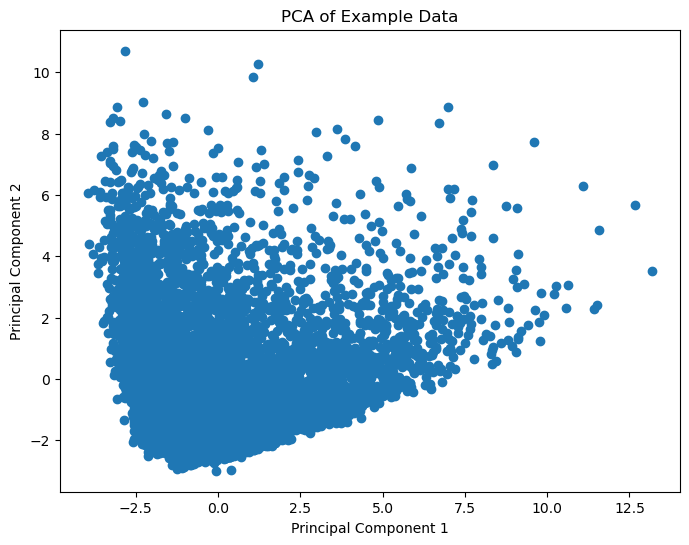

In [40]:
pca_2_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
plt.figure(figsize=(8, 6))
plt.scatter(pca_2_df['PC1'], pca_2_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Example Data')
plt.show()

In [41]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8336 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8336 non-null   float64
 1   BALANCE_FREQUENCY                 8336 non-null   float64
 2   PURCHASES                         8336 non-null   float64
 3   ONEOFF_PURCHASES                  8336 non-null   float64
 4   INSTALLMENTS_PURCHASES            8336 non-null   float64
 5   CASH_ADVANCE                      8336 non-null   float64
 6   PURCHASES_FREQUENCY               8336 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8336 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8336 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8336 non-null   float64
 10  CASH_ADVANCE_TRX                  8336 non-null   int64  
 11  PURCHASES_TRX                     8336 non-null   int64  
 12  CREDIT_LIMI

#### Dimention Reduction using PCA
K-means, DBSCAN and agglomerative clustering, all use the Euclidean distance, which starts to lose its meaning when the number of dimensions starts increasing. so, before using these methods, we have to reduce the number of dimensions. We are going to use PCA, which is by far the most popular dimensionality reduction algorithm.

Please set the parameter `n_components` equals to 0.9, which means that the PCA will automatically produce enough PCs that will preserve 90% of variance in the dataset.

In [42]:
pca = PCA(n_components=0.9, random_state=23)
pca.fit_transform(df_min_max_scaled)

array([[-0.47946493, -0.18588764,  0.02158042, ...,  0.04664046,
         0.03336112, -0.01175651],
       [-0.66228066,  0.07152117, -0.01901932, ...,  0.21669491,
        -0.05263015,  0.07148211],
       [ 0.29436764,  0.76225245,  0.36015062, ..., -0.14220331,
         0.10335274, -0.08487013],
       ...,
       [ 0.34107469, -0.48869648, -0.05737614, ..., -0.87900497,
         0.05594667,  0.18252891],
       [-0.64836104, -0.33285051,  0.2083795 , ..., -0.80548264,
         0.12132734,  0.24038134],
       [-0.08191809,  0.29513165,  0.32344686, ..., -1.07325748,
        -0.10047556, -0.06380271]])

# Train the Model
Now that we have done the preprocessing step, we can perform K-means clustering on the data.

* Find the `n_clusters` parameter using the elbow method.
* Train the model.

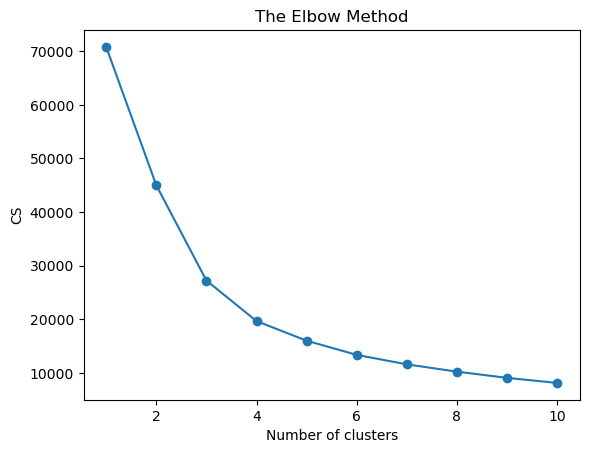

In [43]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(pca_2_df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

## k = 4

In [44]:
kmeans = KMeans(n_clusters=4, random_state=23)

kmeans.fit(df_min_max_scaled)

KMeans(n_clusters=4, random_state=23)

# Evaluate the Model

# Plot the data points with their predicted cluster center

In [45]:
y = pd.Series(kmeans.labels_, name='y')

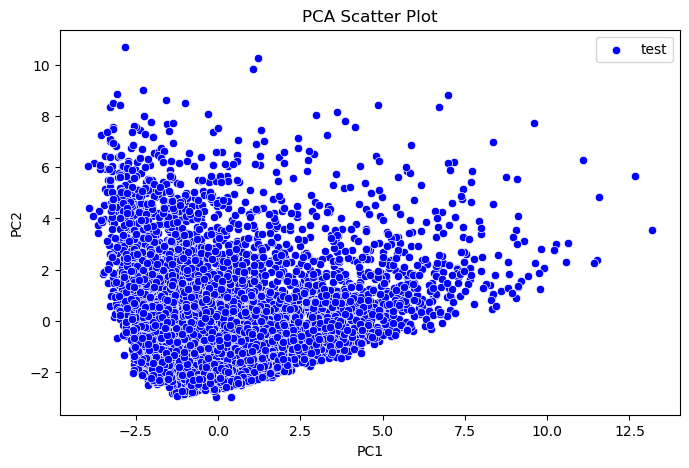

In [46]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x = X_pca[:,0], y=X_pca[:,1],label="test", marker='o', color='blue')
#sns.scatterplot(x=y[:,0], y=y[:,1], label='train', marker='o', color='red')

plt.title('PCA Scatter Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()